# Outfit of customers

## Description

Clients began to leave Beta-Bank.Every month.A little, but noticeable.Banking marketers considered: saving current customers is cheaper than attracting new ones.

It is necessary to predict whether the client will leave the bank in the near future or not.You are provided with historical data on customer behavior and termination of contracts with the bank.

A post-Russian model with an extremely large value *F1 *-dime.To pass the project successfully, you need to bring the metric to 0.59.Check *F1 *-er in a test sample yourself.

Additionally measure *aUC-ROC *, compare its value C *F1 *-Mary.

Data source: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](chttps://www.kaghe.com/barelyDedicated/bank-customer-churn-modeling)

- We load and prepare data, explanations of the procedure.

- We study the balance of classes, we will train the model without taking into account the imbalance.Briefly describe the conclusions.

- We will improve the quality of the model, taking into account the imbalance of classes.We will train different models and find the best.Briefly describe the conclusions.

- Conduct the final testing.

Data description
- Data are in the /datasets/churn.csv file (English "Outflow of customers").[Download Dataset] (https://code.s3.yandex.net/datasets/churn.csv "https://code.s3.yandex.net/datasets/churn.csv")

Signs
- `RowNumber` - line index in the data
- `CustomerId` - a unique client identifier
- `surname` - surname
- `CreditScore` - Credit rating
- `geography` - country of residence
- `Gender` - Paul
- `Age` - Age
- `Tenure` - how many years a person is a client of a bank
- `Balance` - Balance in the account
- `NumOfProducts` - the number of bank products used by the client
- `HasCrCard` - the availability of a credit card
- `IsActiveMember` - client activity
- `EstimatedSalary` - the estimated salary

Target sign
- `Exited` - the fact of the client's departure

## Data Preparation

### Library and Data Loading

In [27]:
import pandas as pd
import numpy as np
import os.path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc, precision_score, recall_score

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.mode.chained_assignment = None

plt.style.use('dark_background')

We have two links to the dataset and these datasets are not identical. Let's download both and compare

since it is in the archive on kaggle, then if it is not downloaded, we download the duplicate from github in an alternative way, it is identical there

In [28]:
# from Yandex server
try:
    path = os.path.join('/datasets/Churn.csv')
    data = pd.read_csv(path)
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

# from kaggle
try:
    path_k = os.path.join('/datasets/Churn_Modelling.csv')
    data_k = pd.read_csv(path_k)
except:
    data_k = pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Churn-Modelling-Dataset/master/Churn_Modelling.csv')


## Primary Data Inspection

In [29]:
def first_view(data):
    title_lenght = 79
    title_one = 'Overview of the data of the first and last five rows'
    print('~' * int((title_lenght - len(title_one)) / 2), title_one, '~' * (title_lenght - len(title_one) - int((title_lenght - len(title_one)) / 2)))
    display(data.head(5))
    display(data.tail(5))
    print()
    title_two = 'General describe info'
    print('~' * int((title_lenght - len(title_two)) / 2), title_two, '~' * (title_lenght - len(title_two) - int((title_lenght - len(title_two)) / 2)))
    display(data.describe())
    print()
    title_three = 'Data type' 
    print('~' * int((title_lenght - len(title_three)) / 2), title_three, '~' * (title_lenght - len(title_three) - int((title_lenght - len(title_three)) / 2)))
    data.info()
    print()
    title_four = 'Missings'
    print('~' * int((title_lenght - len(title_four)) / 2), title_four, '~' * (title_lenght - len(title_four) - int((title_lenght - len(title_four)) / 2)))
    all_nulls = 0
    for col in data.columns:
       if data[col].isna().sum() > 0:
            all_nulls += 1
            print(f"{data[col].isna().sum()} missing values ​​in the column {col}. it's {round(data[col].isna().mean() * 100, 2)}%")
    if all_nulls == 0:
        print('There are no gaps in the data frame')
    print()
    title_five = 'Obvious duplicates'
    print('~' * int((title_lenght - len(title_five)) / 2), title_five, '~' * (title_lenght - len(title_five) - int((title_lenght - len(title_five)) / 2)))
    if data.duplicated().sum() > 0:
        print('Count of obvious duplicates - ', data.duplicated().sum())
    else:
        print('There is no Obvious duplicates in data frame')

In [30]:
first_view(data)

~~~~~~~~~~~~~ Overview of the data of the first and last five rows ~~~~~~~~~~~~~~


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.00,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.00,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.00,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.00,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.00,125510.82,1,1,1,79084.10,0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.00,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.00,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.00,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.00,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ General describe info ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,9091.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5000.50,15690940.57,650.53,38.92,5.00,76485.89,1.53,0.71,0.52,100090.24,0.20
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,2500.75,15628528.25,584.00,32.00,2.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Data type ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB

~~~~~~~~~~

In [31]:
first_view(data_k)

~~~~~~~~~~~~~ Overview of the data of the first and last five rows ~~~~~~~~~~~~~~


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ General describe info ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,5000.50,15690940.57,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.20
std,2886.90,71936.19,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40
min,1.00,15565701.00,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,2500.75,15628528.25,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,5000.50,15690738.00,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
75%,7500.25,15753233.75,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,10000.00,15815690.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Data type ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB

~~~~~~~~~~

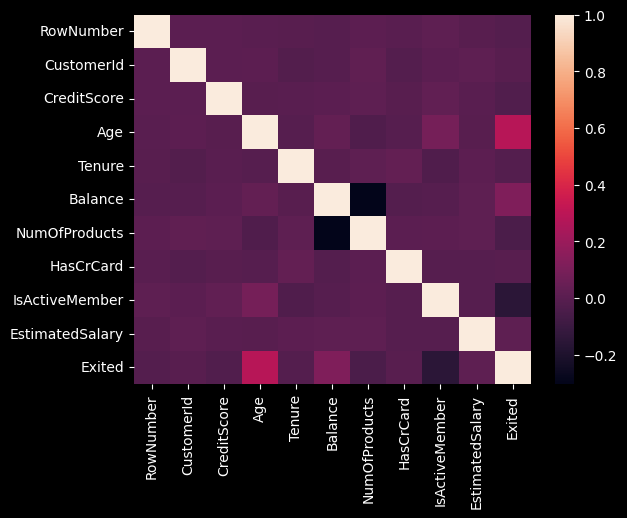

In [32]:
sns.heatmap(data.select_dtypes(include=[float, int]).corr());

In [33]:
print('"surname" column classes', data['Surname'].unique())
print('"geography" column classes', data['Geography'].unique())
print('"gender" column classes', data['Gender'].unique())

"surname" column classes ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
"geography" column classes ['France' 'Spain' 'Germany']
"gender" column classes ['Female' 'Male']


In [34]:
print('Count of unique classes of "surname" column =', len(data['Surname'].unique()))

Count of unique classes of "surname" column = 2932


Conclusion from the inspection of data:

- In the Dataset from the `Yandex` server in the `Tenure` column there are 9% of missing values while in `Kaggle` Dataset there are no. Presumably, when copying, some kind of technical or man-made errors arose and the data in the copies were lost, it is necessary to inform `Yandex` about it for correct it. In the initial data, in description of the project, it was said that the source of data is `Kaggle` with reference to it, but of course we will not use the Dataset with `Kaggle`, because `Yandex` server indicates another Dataset and they want me to work with this missings =).

- There are three columns with the unique values ​​of each line of `RowNumber`, `CustomerId` and `Surname`, which we will need to remove the TC for training the model, they obviously do not affect the result and only make distortions.

- There are columns with the Object type, they will need to be encoded to teach the model.

- There were no obvious duplicates.

- Multicollinearity is not observed.

### Rename the columns

In [35]:
data = data.rename(columns={
    'RowNumber': 'row_number', 
    'CustomerId': 'customer_id', 
    'Surname': 'surname',
    'CreditScore': 'credit_score',
    'Geography': 'geography',
    'Gender': 'gender',
    'Age': 'age',
    'Tenure': 'tenure',
    'Balance': 'balance',
    'NumOfProducts': 'num_of_products',
    'HasCrCard': 'has_credit_card',
    'IsActiveMember': 'is_active_member',
    'EstimatedSalary': 'estimated_salary',
    'Exited': 'exited'
})

data.columns.tolist()

['row_number',
 'customer_id',
 'surname',
 'credit_score',
 'geography',
 'gender',
 'age',
 'tenure',
 'balance',
 'num_of_products',
 'has_credit_card',
 'is_active_member',
 'estimated_salary',
 'exited']

### Get rid of missings

One could use the method of `.fillna()` and fill in passes with a median value, it would be possible to remove all the lines in which there are passes, BUT! Since we have access to the initial data from the Kaggle Dataset, we just take data from there, they will be 100% better than median values ​​=)

In [36]:
data['tenure'] = data_k['Tenure']

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  int64  
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_credit_card   10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Great, there are no more missiongs =)

## The study of the problem

### break the dataset into training, valid and test samples

In [37]:
x = data.drop('exited', axis=1)
y = data['exited']

x_train_n_valid, x_test, y_train_n_valid, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1337)

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_n_valid, y_train_n_valid, test_size=0.25, random_state=1337)

print('Shape of the training set:')
print(f'features {x_train.shape};')
print(f'target {y_train.shape}')
print(f"it's {round((y_train.count() / y.count()) * 100)}% of dataset")
print()
print('Shape of the validation set:')
print(f'features {x_valid.shape};')
print(f'target {y_valid.shape}')
print(f"it's {round((y_valid.count() / y.count()) * 100)}% of dataset")
print()
print('Shape of the test set:')
print(f'features {x_test.shape};')
print(f'target {y_test.shape}')
print(f"it's {round((y_test.count() / y.count()) * 100)}% of dataset")

Shape of the training set:
features (6000, 13);
target (6000,)
it's 60% of dataset

Shape of the validation set:
features (2000, 13);
target (2000,)
it's 20% of dataset

Shape of the test set:
features (2000, 13);
target (2000,)
it's 20% of dataset


### Preparation of Signs

#### remove extra columns

Pillars with unique values ​​for each line (namely `Row_number` and` Customer_id`), so with surnames and columns with the country we do not need models, get rid of them

In [38]:
x_train = x_train.drop(['row_number', 'customer_id', 'surname'], axis=1)
x_valid = x_valid.drop(['row_number', 'customer_id', 'surname'], axis=1)
x_test = x_test.drop(['row_number', 'customer_id', 'surname'], axis=1)

### Coding

Columns with the type `Object` must be encoded.We use the `Ohe (One-Hot Encoding)`

In [39]:
x_train = pd.get_dummies(x_train, drop_first=True)
x_valid = pd.get_dummies(x_valid, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)

### scaling

In [40]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']

scaler = StandardScaler()
scaler.fit(x_train[numeric])

x_train[numeric] = scaler.transform(x_train[numeric])
x_valid[numeric] = scaler.transform(x_valid[numeric])
x_test[numeric] = scaler.transform(x_test[numeric])

### RandomForestClassifier model

In [41]:
best_rf_model = None
best_rf_f1_result = 0
best_est = 0
for est in range(10, 201, 10):
    model = RandomForestClassifier(random_state=1337, n_estimators=est)
    model.fit(x_train, y_train)
    predict_valid = model.predict(x_valid)  
    f1_result = f1_score(predict_valid, y_valid)
    if f1_result > best_rf_f1_result:
        best_rf_model = model
        best_rf_f1_result = f1_result
        best_est = est

print("RandomForestClassifier F1 score:", round(best_rf_f1_result, 4), "with n_estimators =", best_est)

RandomForestClassifier F1 score: 0.618 with n_estimators = 140


#### Calculate ROC-AUC & plot the graph

RandomForestClassifier: ROC-AUC = 0.86


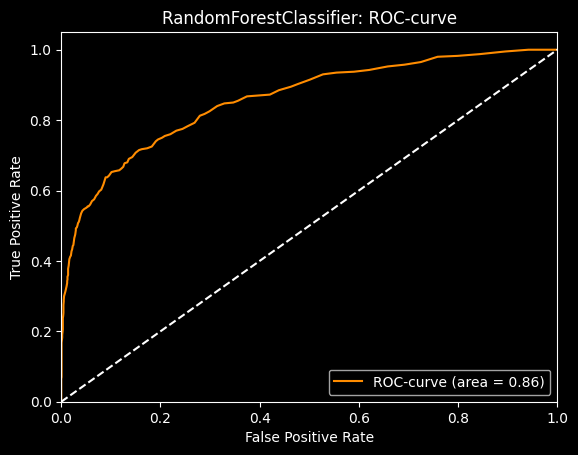

In [42]:
probabilities_valid = best_rf_model.predict_proba(x_valid)
probabilities_one_valid = probabilities_valid[:, 1]
rf_roc_auc = roc_auc_score(y_valid, probabilities_one_valid)
print(f'RandomForestClassifier: ROC-AUC = {round(rf_roc_auc, 2)}')

fpr, tpr, treshold = roc_curve(y_valid, probabilities_one_valid)
rf_auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label=f'ROC-curve (area = {round(rf_auc_score, 2)})')
plt.plot([0, 1], [0, 1], color='white', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier: ROC-curve')
plt.legend(loc="lower right")
plt.show()

### DecisionTreeClassifier model

In [43]:
best_dt_model = None
best_dt_f1_result = 0
best_depth = 0
for depth in range(1, 20):
	model = DecisionTreeClassifier(random_state=1337, max_depth=depth)
	model.fit(x_train, y_train)
	predict_valid = model.predict(x_valid)
	f1_result = f1_score(predict_valid, y_valid)
	if f1_result > best_dt_f1_result:
		best_dt_model = model
		best_dt_f1_result = f1_result
		best_depth = depth
        
print("DecisionTreeClassifier F1 score:", round(best_dt_f1_result, 4), "with max_depth =", best_depth)

DecisionTreeClassifier F1 score: 0.6046 with max_depth = 7


#### Calculate ROC-AUC & plot the graph

DecisionTreeClassifier: ROC-AUC = 0.83


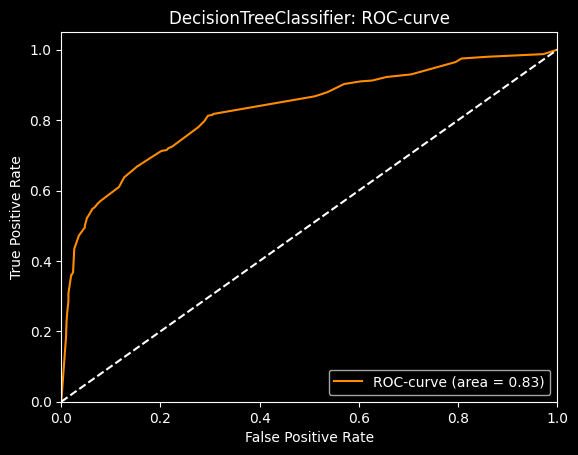

In [44]:
probabilities_valid = best_dt_model.predict_proba(x_valid)
probabilities_one_valid = probabilities_valid[:, 1]
dt_roc_auc = roc_auc_score(y_valid, probabilities_one_valid)
print(f'DecisionTreeClassifier: ROC-AUC = {round(dt_roc_auc, 2)}')

fpr, tpr, treshold = roc_curve(y_valid, probabilities_one_valid)
dt_auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label=f'ROC-curve (area = {round(dt_auc_score, 2)})')
plt.plot([0, 1], [0, 1], color='white', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DecisionTreeClassifier: ROC-curve')
plt.legend(loc="lower right")
plt.show()

### LogisticsRegression model

In [45]:
lr_model = LogisticRegression(random_state=1, solver='lbfgs', max_iter=1000) 
lr_model.fit(x_train, y_train) 
predict_valid = lr_model.predict(x_valid)
lr_f1_result = f1_score(predict_valid, y_valid)

print("LogisticsRegression F1 score:", round(lr_f1_result, 4))

LogisticsRegression F1 score: 0.3258


#### Calculate ROC-AUC & plot the graph

LogisticRegression: ROC-AUC = 0.77


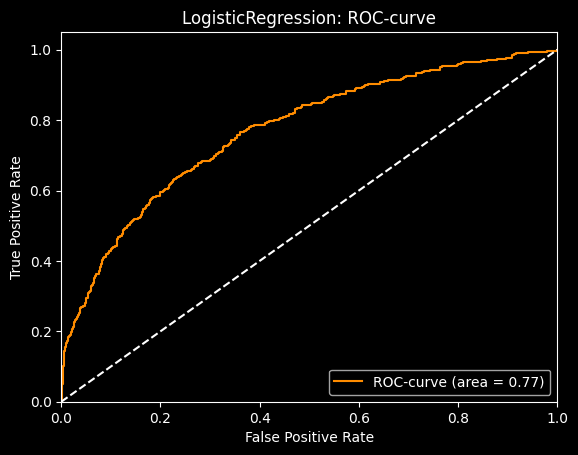

In [46]:
probabilities_valid = lr_model.predict_proba(x_valid)
probabilities_one_valid = probabilities_valid[:, 1]
lr_roc_auc = roc_auc_score(y_valid, probabilities_one_valid)
print(f'LogisticRegression: ROC-AUC = {round(lr_roc_auc, 2)}')

fpr, tpr, treshold = roc_curve(y_valid, probabilities_one_valid)
lr_auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label=f'ROC-curve (area = {round(lr_auc_score, 2)})')
plt.plot([0, 1], [0, 1], color='white', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression: ROC-curve')
plt.legend(loc="lower right")
plt.show()

### Compare models

In [47]:
model_names = ['RandomForestClassifier', 'DecisionTreeClassifier', 'LogisticRegression']
f1_scores = [best_rf_f1_result, best_dt_f1_result, lr_f1_result]
roc_auc_scores = [rf_roc_auc, dt_roc_auc, lr_roc_auc]

models_dif = pd.DataFrame({'Models':model_names,
                        'F1 Scores':f1_scores,
                        'ROC-AUS Scores':roc_auc_scores}
                       )
models_dif

,Models,F1 Scores,ROC-AUS Scores
0,RandomForestClassifier,0.62,0.86
1,DecisionTreeClassifier,0.60,0.83
2,LogisticRegression,0.33,0.77


The best result was shown by a model of random forest.

Check the imbalance

In [48]:
ones_in_data = data['exited'].sum() / len(data['exited'])
ones_in_train = y_train.sum() / len(y_train)

print(f'weight of class "1" in target of full dataset  = {round(ones_in_data, 2)}')
print(f'weight of class "1" in target of train set = {round(ones_in_train, 2)}')

weight of class "1" in target of full dataset  = 0.2
weight of class "1" in target of train set = 0.21


There is a skew towards class "0".Let's try to fix it

## The fight against an imbalance

## upsampling

In [49]:
def upsample(x, y, repeat):
    x_zeros = x[y == 0]
    x_ones = x[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]

    x_upsampled = pd.concat([x_zeros] + [x_ones] * repeat)
    y_upsampled = pd.concat([y_zeros] + [y_ones] * repeat)

    x_upsampled, y_upsampled = shuffle(
        x_upsampled, y_upsampled, random_state=12345)
    
    return x_upsampled, y_upsampled

x_upsampled, y_upsampled = upsample(x_train, y_train, 4)

print(x_upsampled.shape)
print(y_upsampled.shape)

(9714, 11)
(9714,)


In [50]:
print(f'weight of class "1" in target of upsampled dataset = {round(y_upsampled.sum() / len(y_upsampled), 2)}')

weight of class "1" in target of upsampled dataset = 0.51


### We will check how the result on the validation sample has changed after the upsem cling with a RandomForest model

In [51]:
best_us_rf_model = None
best_us_rf_f1_result = 0
best_est = 0
for est in range(10, 201, 10):
    model = RandomForestClassifier(random_state=1337, n_estimators=est)
    model.fit(x_upsampled, y_upsampled)
    predict_valid = model.predict(x_valid)
    f1_result = f1_score(predict_valid, y_valid)
    if f1_result > best_us_rf_f1_result:
        best_us_rf_model = model
        best_us_rf_f1_result = f1_result
        best_est = est

print("upsampled RandomForestClassifier F1 score:", round(best_us_rf_f1_result, 4), "with n_estimators =", best_est)

upsampled RandomForestClassifier F1 score: 0.6218 with n_estimators = 50


#### Calculate ROC-AUC & plot the graph

Upsampled RandomForestClassifier: ROC-AUC = 0.85


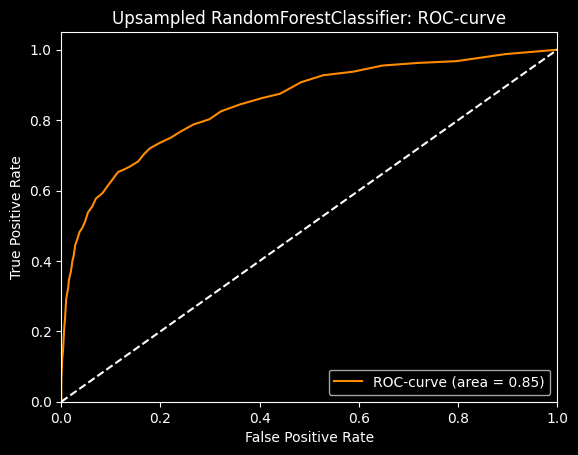

In [52]:
probabilities_valid = best_us_rf_model.predict_proba(x_valid)
probabilities_one_valid = probabilities_valid[:, 1]
us_rf_roc_auc = roc_auc_score(y_valid, probabilities_one_valid)
print(f'Upsampled RandomForestClassifier: ROC-AUC = {round(us_rf_roc_auc, 2)}')

fpr, tpr, treshold = roc_curve(y_valid, probabilities_one_valid)
us_rf_auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label=f'ROC-curve (area = {round(us_rf_auc_score, 2)})')
plt.plot([0, 1], [0, 1], color='white', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Upsampled RandomForestClassifier: ROC-curve')
plt.legend(loc="lower right")
plt.show()

### We will check how the result on the validation sample has changed after the upsem cling with the DecisionTreeClassifier model

In [53]:
best_us_dt_model = None
best_us_dt_f1_result = 0
best_depth = 0
for depth in range(1, 20):
	model = DecisionTreeClassifier(random_state=1337, max_depth=depth)
	model.fit(x_upsampled, y_upsampled)
	predict_valid = model.predict(x_valid)
	f1_result = f1_score(predict_valid, y_valid)
	if f1_result > best_us_dt_f1_result:
		best_us_dt_model = model
		best_us_dt_f1_result = f1_result
		best_depth = depth
        
print("Upsampled DecisionTreeClassifier F1 score:", round(best_us_dt_f1_result, 4), "with max_depth =", best_depth)

Upsampled DecisionTreeClassifier F1 score: 0.5665 with max_depth = 7


#### Calculate ROC-AUC & plot the graph

Upsampled DecisionTreeClassifier: ROC-AUC = 0.82


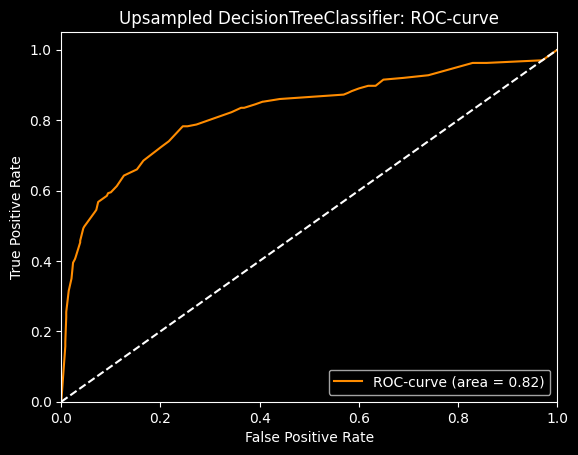

In [54]:
probabilities_valid = best_us_dt_model.predict_proba(x_valid)
probabilities_one_valid = probabilities_valid[:, 1]
us_dt_roc_auc = roc_auc_score(y_valid, probabilities_one_valid)
print(f'Upsampled DecisionTreeClassifier: ROC-AUC = {round(us_dt_roc_auc, 2)}')

fpr, tpr, treshold = roc_curve(y_valid, probabilities_one_valid)
us_dt_auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label=f'ROC-curve (area = {round(us_dt_auc_score, 2)})')
plt.plot([0, 1], [0, 1], color='white', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Upsampled DecisionTreeClassifier: ROC-curve')
plt.legend(loc="lower right")
plt.show()

#### We will check how the result on the validation sample after the upsem cling with a LogisticRegression model has changed

In [55]:
us_lr_model = LogisticRegression(random_state=1, solver='lbfgs', max_iter=1000) 
us_lr_model.fit(x_upsampled, y_upsampled) 
predict_valid = lr_model.predict(x_valid)
us_lr_f1_result = f1_score(predict_valid, y_valid)

print("Upsampled LogisticRegression F1 score:", round(us_lr_f1_result, 4))

Upsampled LogisticRegression F1 score: 0.3258


#### Calculate ROC-AUC & plot the graph

Upsampled LogisticRegression: ROC-AUC = 0.77


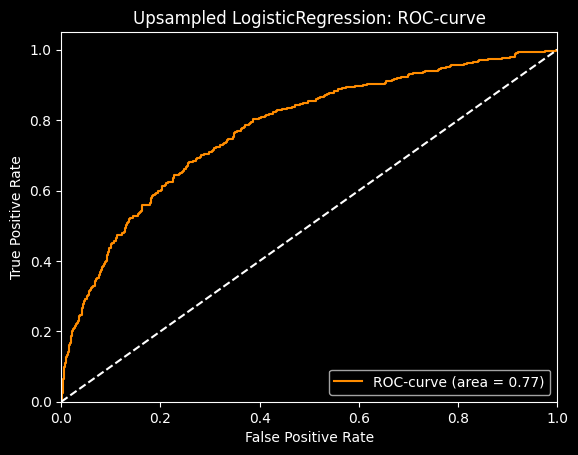

In [56]:
probabilities_valid = us_lr_model.predict_proba(x_valid)
probabilities_one_valid = probabilities_valid[:, 1]
us_lr_roc_auc = roc_auc_score(y_valid, probabilities_one_valid)
print(f'Upsampled LogisticRegression: ROC-AUC = {round(us_lr_roc_auc, 2)}')

fpr, tpr, treshold = roc_curve(y_valid, probabilities_one_valid)
us_lr_auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label=f'ROC-curve (area = {round(us_lr_auc_score, 2)})')
plt.plot([0, 1], [0, 1], color='white', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Upsampled LogisticRegression: ROC-curve')
plt.legend(loc="lower right")
plt.show()

### Downsampling

In [57]:
def downsample(x, y, fraction):
    x_zeros = x[y == 0]
    x_ones = x[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]

    x_downsampled = pd.concat(
        [x_zeros.sample(frac=fraction, random_state=1337)] + [x_ones])
    y_downsampled = pd.concat(
        [y_zeros.sample(frac=fraction, random_state=1337)] + [y_ones])
    
    x_downsampled, y_downsampled = shuffle(
        x_downsampled, y_downsampled, random_state=1337)
    
    return x_downsampled, y_downsampled

x_downsampled, y_downsampled = downsample(x_train, y_train, 0.25)

In [58]:
print(f'weight of class "1" in target of downsampled dataset =  = {round(y_downsampled.sum() / len(y_downsampled), 2)}')

weight of class "1" in target of downsampled dataset =  = 0.51


#### We will check how the result on the validation sample has changed after the downshole with a random forest model

In [59]:
best_ds_rf_model = None
best_ds_rf_f1_result = 0
best_est = 0
for est in range(10, 201, 10):
    model = RandomForestClassifier(random_state=1337, n_estimators=est)
    model.fit(x_downsampled, y_downsampled)
    predict_valid = model.predict(x_valid)
    f1_result = f1_score(predict_valid, y_valid)
    if f1_result > best_ds_rf_f1_result:
        best_ds_rf_model = model
        best_ds_rf_f1_result = f1_result
        best_est = est

print("F1 score of best model:", round(best_ds_rf_f1_result, 4), "with n_estimators =", best_est)

F1 score of best model: 0.5772 with n_estimators = 110


#### Calculate ROC-AUC & plot the graph

Downsampled RandomForestClassifier: ROC-AUC = 0.85


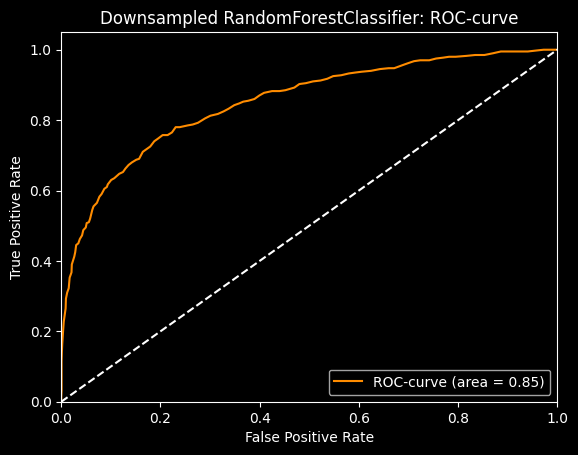

In [60]:
probabilities_valid = best_ds_rf_model.predict_proba(x_valid)
probabilities_one_valid = probabilities_valid[:, 1]
ds_rf_roc_auc = roc_auc_score(y_valid, probabilities_one_valid)
print(f'Downsampled RandomForestClassifier: ROC-AUC = {round(ds_rf_roc_auc, 2)}')

fpr, tpr, treshold = roc_curve(y_valid, probabilities_one_valid)
ds_rf_auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label=f'ROC-curve (area = {round(ds_rf_auc_score, 2)})')
plt.plot([0, 1], [0, 1], color='white', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Downsampled RandomForestClassifier: ROC-curve')
plt.legend(loc="lower right")
plt.show()

#### We will check how the result on the validation sample has changed after the downsmaking with a decisive tree model

In [61]:
best_ds_dt_model = None
best_ds_dt_f1_result = 0
best_depth = 0
for depth in range(1, 20):
	model = DecisionTreeClassifier(random_state=1337, max_depth=depth)
	model.fit(x_downsampled, y_downsampled)
	predict_valid = model.predict(x_valid)
	f1_result = f1_score(predict_valid, y_valid)
	if f1_result > best_ds_dt_f1_result:
		best_ds_dt_model = model
		best_ds_dt_f1_result = f1_result
		best_depth = depth
        
print("F1 score of best model:", round(best_ds_dt_f1_result, 4), "with max_depth =", best_depth)

F1 score of best model: 0.5551 with max_depth = 6


#### Calculate ROC-AUC & plot the graph

Downsampled DecisionTreeClassifier: ROC-AUC = 0.83


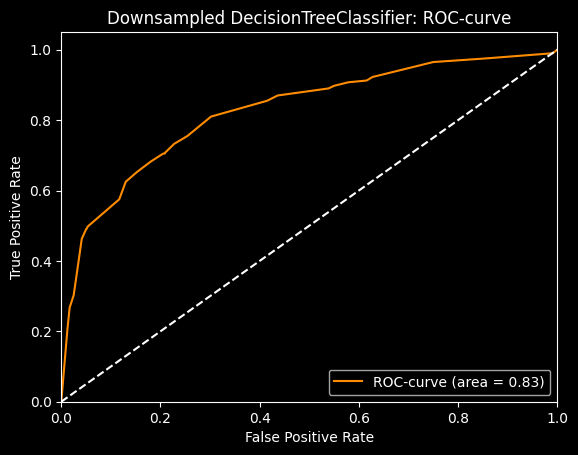

In [62]:
probabilities_valid = best_ds_dt_model.predict_proba(x_valid)
probabilities_one_valid = probabilities_valid[:, 1]
ds_dt_roc_auc = roc_auc_score(y_valid, probabilities_one_valid)
print(f'Downsampled DecisionTreeClassifier: ROC-AUC = {round(ds_dt_roc_auc, 2)}')

fpr, tpr, treshold = roc_curve(y_valid, probabilities_one_valid)
ds_dt_auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label=f'ROC-curve (area = {round(ds_dt_auc_score, 2)})')
plt.plot([0, 1], [0, 1], color='white', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Downsampled DecisionTreeClassifier: ROC-curve')
plt.legend(loc="lower right")
plt.show()

#### We will check how the result on the validation sample has changed after the downshole with a LogisticRegression model

In [63]:
ds_lr_model = LogisticRegression(random_state=1, solver='lbfgs', max_iter=1000) 
ds_lr_model.fit(x_downsampled, y_downsampled) 
predict_valid = lr_model.predict(x_valid)
ds_lr_f1_result = f1_score(predict_valid, y_valid)

print("F1 score of model:", round(ds_lr_f1_result, 4))

F1 score of model: 0.3258


#### Calculate ROC-AUC & plot the graph

Downsampled LogisticRegression: ROC-AUC = 0.77


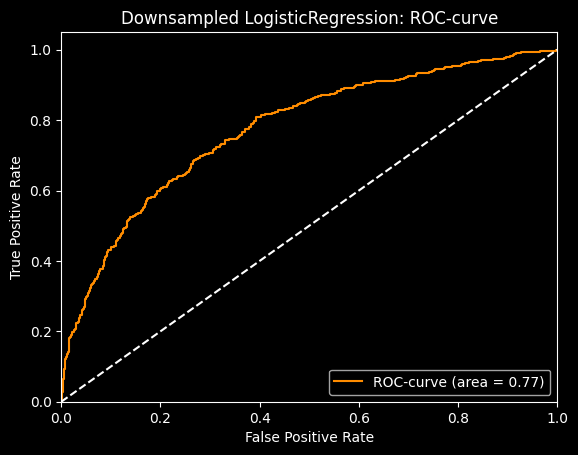

In [64]:
probabilities_valid = ds_lr_model.predict_proba(x_valid)
probabilities_one_valid = probabilities_valid[:, 1]
ds_lr_roc_auc = roc_auc_score(y_valid, probabilities_one_valid)
print(f'Downsampled LogisticRegression: ROC-AUC = {round(ds_lr_roc_auc, 2)}')

fpr, tpr, treshold = roc_curve(y_valid, probabilities_one_valid)
ds_lr_auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label=f'ROC-curve (area = {round(ds_lr_auc_score, 2)})')
plt.plot([0, 1], [0, 1], color='white', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Downsampled LogisticRegression: ROC-curve')
plt.legend(loc="lower right")
plt.show()

### compare the models

In [65]:
model_names = ['us_RandomForestClassifier',
               'us_DecisionTreeClassifier', 
               'us_LogisticRegression', 
               'ds_RandomForestClassifier', 
               'ds_DecisionTreeClassifier', 
               'ds_LogisticRegression'
               ]

f1_scores = [best_us_rf_f1_result,
             best_us_dt_f1_result, 
             us_lr_f1_result,
             best_ds_rf_f1_result,
             best_ds_dt_f1_result, 
             ds_lr_f1_result
             ]

roc_auc_scores = [us_rf_roc_auc,
                  us_dt_roc_auc, 
                  us_lr_roc_auc,
                  ds_rf_roc_auc,
                  ds_dt_roc_auc, 
                  ds_lr_roc_auc
                  ]

models_dif = pd.DataFrame({'Models':model_names,
                        'F1 Scores':f1_scores,
                        'ROC-AUS Scores':roc_auc_scores}
                       )
models_dif

,Models,F1 Scores,ROC-AUS Scores
0,us_RandomForestClassifier,0.62,0.85
1,us_DecisionTreeClassifier,0.57,0.82
2,us_LogisticRegression,0.33,0.77
3,ds_RandomForestClassifier,0.58,0.85
4,ds_DecisionTreeClassifier,0.56,0.83
5,ds_LogisticRegression,0.33,0.77


Conclusion on the methods of combating an imbalance:

Upsemling showed himself better

### Let's try to improve the best model

In [66]:
best_us_fr_model = None
best_us_fr_f1_result = 0
best_est = 0
best_depth = 0
graf = {}
for est in range(200, 801, 100):
    for depth in range (1, 18):
        model = RandomForestClassifier(random_state=1337, n_estimators=est, max_depth=depth)
        model.fit(x_upsampled, y_upsampled)
        predict_valid = model.predict(x_valid)
        f1_result = f1_score(predict_valid, y_valid)
        graf[str(est)+"_"+str(depth)] = [est, depth, f1_result]
        if f1_result > best_us_fr_f1_result:
            best_us_fr_model = model
            best_us_fr_f1_result = f1_result
            best_est = est
            best_depth = depth

print("F1 score of best model:", round(best_us_fr_f1_result, 4), "with n_estimators =", best_est, "and best_depth =", best_depth)

F1 score of best model: 0.6399 with n_estimators = 300 and best_depth = 16


#### 3D plot

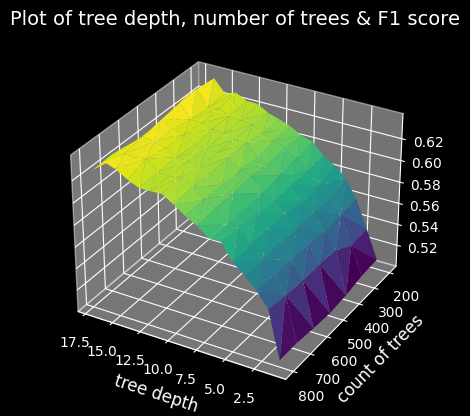

In [67]:
gr = pd.DataFrame.from_dict(graf).T
gr = gr.reset_index()
gr = gr.drop(['index'], axis = 1)
gr.columns = ["X","Y","Z"]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(gr['Y'], gr['X'], gr['Z'], cmap = plt.cm.viridis, linewidth = 0.2)
ax.view_init(30, 120)
plt.title(f'Plot of tree depth, number of trees & F1 score', 
              fontsize=14)
plt.xlabel('tree depth', fontsize=12)
plt.ylabel('count of trees', fontsize=12)
plt.show()

In [68]:
best_us_rf_model = None
best_us_rf_f1_result = 0
best_est = 0
best_depth = 0
graf = {}
for est in range(250, 351, 10):
    for depth in range (15, 25):
        model = RandomForestClassifier(random_state=1337, n_estimators=est, max_depth=depth)
        model.fit(x_upsampled, y_upsampled)
        predict_valid = model.predict(x_valid)
        f1_result = f1_score(predict_valid, y_valid)
        graf[str(est)+"_"+str(depth)] = [est, depth, f1_result]
        if f1_result > best_us_rf_f1_result:
            best_us_rf_model = model
            best_us_rf_f1_result = f1_result
            best_est = est
            best_depth = depth

print("F1 score of best model:", round(best_us_rf_f1_result, 4), "with n_estimators =", best_est, "and best_depth =", best_depth)

F1 score of best model: 0.6425 with n_estimators = 280 and best_depth = 16


#### 3D plot

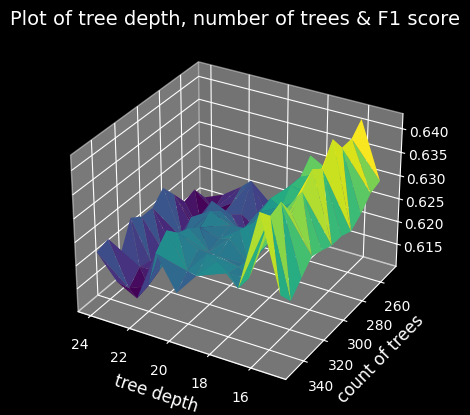

In [69]:
gr = pd.DataFrame.from_dict(graf).T
gr = gr.reset_index()
gr = gr.drop(['index'], axis = 1)
gr.columns = ["X","Y","Z"]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(gr['Y'], gr['X'], gr['Z'], cmap = plt.cm.viridis, linewidth = 0.2)
ax.view_init(30, 120)
plt.title(f'Plot of tree depth, number of trees & F1 score', 
              fontsize=14)
plt.xlabel('tree depth', fontsize=12)
plt.ylabel('count of trees', fontsize=12)
plt.show()

#### Finding best trashold

In [70]:
def find_best_threshold(model, x_valid, y_valid, depth=2):
    probabilities_valid = model.predict_proba(x_valid)
    probabilities_one_valid = probabilities_valid[:, 1]

    start = 0.0
    end = 1.0
    step = 0.1
    best_threshold = 0.0
    best_f1 = 0.0
    
    while step >= 10 ** -depth:
        print(f'## start iteration with step {step}')
        for threshold in np.arange(start, end, step):
            predicted_valid = probabilities_one_valid > threshold
            precision = precision_score(y_valid, predicted_valid)
            recall = recall_score(y_valid, predicted_valid)
            f1 = f1_score(y_valid, predicted_valid)
            print(f'Threshold = {round(threshold, depth)} | Precision = {round(precision, 3)}, Recall = {round(recall, 3)}, F1 = {round(f1, 5)}')

            if f1 > best_f1:
                best_f1 = f1
                best_threshold = threshold
        
        start = best_threshold - step*0.9
        end = best_threshold + step
        step /= 10
        print(f'best f1 score on iteration = {round(best_f1, 4)} with trashold = {round(best_threshold, depth)}')
        print()

    return round(best_threshold, depth), best_f1

best_us_rf_threshold, best_us_rf_f1 = find_best_threshold(best_us_rf_model, x_valid, y_valid, depth=2)
print(f'Best Threshold = {best_us_rf_threshold}, Best F1 = {round(best_us_rf_f1, 4)}')

## start iteration with step 0.1
Threshold = 0.0 | Precision = 0.201, Recall = 1.0, F1 = 0.33459
Threshold = 0.1 | Precision = 0.284, Recall = 0.952, F1 = 0.43718
Threshold = 0.2 | Precision = 0.368, Recall = 0.852, F1 = 0.51394
Threshold = 0.3 | Precision = 0.461, Recall = 0.748, F1 = 0.57007
Threshold = 0.4 | Precision = 0.547, Recall = 0.688, F1 = 0.60908
Threshold = 0.5 | Precision = 0.667, Recall = 0.62, F1 = 0.64249
Threshold = 0.6 | Precision = 0.746, Recall = 0.507, F1 = 0.60417
Threshold = 0.7 | Precision = 0.828, Recall = 0.41, F1 = 0.54849
Threshold = 0.8 | Precision = 0.875, Recall = 0.262, F1 = 0.40385
Threshold = 0.9 | Precision = 0.955, Recall = 0.105, F1 = 0.18919
best f1 score on iteration = 0.6425 with trashold = 0.5

## start iteration with step 0.01
Threshold = 0.41 | Precision = 0.559, Recall = 0.682, F1 = 0.61486
Threshold = 0.42 | Precision = 0.57, Recall = 0.675, F1 = 0.61785
Threshold = 0.43 | Precision = 0.586, Recall = 0.662, F1 = 0.62207
Threshold = 0.44 | P

#### Calculate ROC-AUC & plot the graph

RandomForestClassifier: ROC-AUC = 0.85


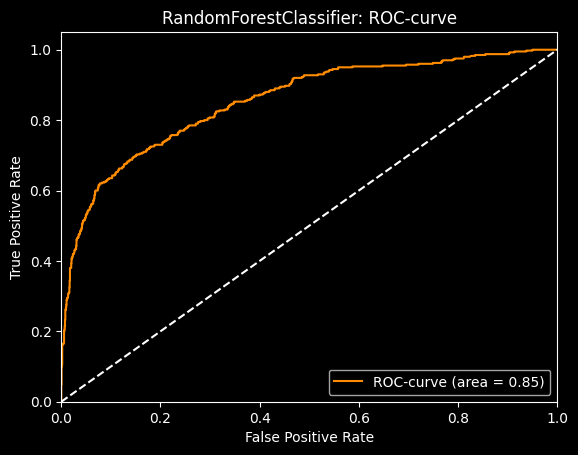

In [71]:
probabilities_valid = best_us_rf_model.predict_proba(x_valid)
probabilities_one_valid = probabilities_valid[:, 1]
us_roc_auc = roc_auc_score(y_valid, probabilities_one_valid)
print(f'RandomForestClassifier: ROC-AUC = {round(us_roc_auc, 2)}')

fpr, tpr, treshold = roc_curve(y_valid, probabilities_one_valid)
us_auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label=f'ROC-curve (area = {round(us_auc_score, 2)})')
plt.plot([0, 1], [0, 1], color='white', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier: ROC-curve')
plt.legend(loc="lower right")
plt.show()

## Testing of the model

In [72]:
probabilities_valid = best_us_rf_model.predict_proba(x_test)
probabilities_one_valid = probabilities_valid[:, 1]
predicted_valid = probabilities_one_valid > best_us_rf_threshold
test_f1 = f1_score(y_test, predicted_valid)

print(f'F1 score of model on test set: {round(test_f1, 4)}')

F1 score of model on test set: 0.6189


#### Calculate ROC-AUC & plot the graph

RandomForestClassifier: ROC-AUC = 0.86


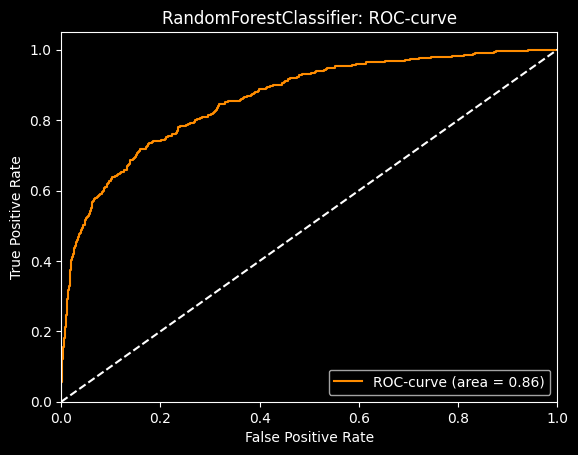

In [73]:
probabilities_valid = best_us_rf_model.predict_proba(x_test)
probabilities_one_valid = probabilities_valid[:, 1]
test_roc_auc = roc_auc_score(y_test, probabilities_one_valid)
print(f'RandomForestClassifier: ROC-AUC = {round(test_roc_auc, 2)}')

fpr, tpr, treshold = roc_curve(y_test, probabilities_one_valid)
test_auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange',
         label=f'ROC-curve (area = {round(test_auc_score, 2)})')
plt.plot([0, 1], [0, 1], color='white', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier: ROC-curve')
plt.legend(loc="lower right")
plt.show()

### We will check the model for adequacy

In [75]:
dummy_clf = DummyClassifier(strategy="uniform", random_state=1337)
dummy_clf.fit(x_train, y_train)
dummy_predict = dummy_clf.predict(x_test)
dummy_f1 = f1_score(dummy_predict, y_test)

if test_f1 > dummy_f1:
    print(f'F1 score of our model ({round(test_f1, 4)}) '
    f'is higher than with random parameter selection model '
    f'({round(dummy_f1, 4)}), our model is adequate')
else:
    print(f'F1 score of our model ({round(test_f1, 4)}) '
    f'is lower than with random parameter selection model '
    f'({round(dummy_f1, 4)}), our model not adequate')

F1 score of our model (0.6189) is higher than with random parameter selection model (0.2968), our model is adequate


## Conclusion

The data is divided into three samples (training, validation, test).
Three models were trained on training data, the best model of `randomforstclassifier 'was the best, showing the metric F1 = 0.63 on a validation sample.In the data, an imbalance is corrected by the methods of upsem cling and downsem cling, the Upsemling method was better.Better parameters are selected by the method of enrage in the cycle and the best threshold was found - the quality of the model has improved.The final result of the model in the test sample:
- F1 = 0.6189
- ROC-AUC = 0.86

The data on the test sample is slightly worse than on the validation, the model is slightly reduced, but not critical, the expected quality result (F1 at least 0.59) has been achieved.
The model also passed the adequacy test in comparison with a random Dummy model.